# Computer Vision Coursework Submission (IN3060/INM460)

**Kashvi Shah, 210032143 and cohort:** Kashvi Shah (210032143) - PG


# Notebook Setup
In this section you should include all the code cells required to test your coursework submission. Specifically:

### Mount Google Drive

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Define Local Path

In the next cell you should assign to the variable `GOOGLE_DRIVE_PATH_AFTER_MYDRIVE` the relative path of this folder in your Google Drive.

**IMPORTANT:** you have to make sure that **all the files required to test your functions are loaded using this variable** (as was the case for all lab tutorials). In other words, do not use in the notebook any absolute paths. This will ensure that the markers can run your functions. Also, **do not use** the magic command `%cd` to change directory.



In [34]:
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CV_Coursework/CW_Folder_PG/CW_Folder_PG' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['.DS_Store', 'CW_Dataset', 'Video', 'Models', 'Code', 'test_functions.ipynb']


### Load packages 

In the next cell you should load all the packages required to test your functions.

In [35]:
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from skimage import img_as_ubyte, io, color
from sklearn.cluster import MiniBatchKMeans
from sklearn import svm, metrics
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from PIL import Image
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from google.colab.patches import cv2_imshow
import torch.optim as optim
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy
import pickle 
from google.colab.patches import cv2_imshow
import torch.optim as optim
from skimage.feature import hog
from skimage import data, exposure
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import recall_score, roc_auc_score, precision_score, roc_curve, auc
import random
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, train_test_split, learning_curve
import pickle 
from sklearn.neural_network import MLPClassifier

# device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
# print(device)


%matplotlib inline

In [ ]:
## LAB 07

# Identify path to zipped dataset
zip_path = os.path.join(GOOGLE_DRIVE_PATH, 'CW_Dataset')

Zip_path1 = os.path.join(zip_path, 'CW_Dataset.zip')

# Copy it to Colab
!cp '{Zip_path1}' .

# Unzip it
!yes|unzip -q CW_Dataset.zip

# Delete zipped version from Colab (not from Drive)
!rm CW_Dataset.zip

replace test/test_0288_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_0828_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_1505_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_0317_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_1055_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_0647_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_2986_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_1923_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_0591_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_2326_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_1383_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_2676_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_3064_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_2819_aligned.jpg? [y

### Load models

In the next cell you should load all your trained models for easier testing of your functions. Avoid to load them within `EmotionRecognition` and `EmotionRecognitionVideo` to avoid having to reload them each time.

## MLP-HOG

In [ ]:
exp_dict = {"1": "Surprise", "2": "Fear", "3": "Disgust", "4": "Happiness", "5": "Sadness", "6": "Anger",
            "7": "Neutral"}

In [ ]:
def EmotionRecognition_MLP(test_path,model_type):
  files = [file for file in sorted(os.listdir(test_path)) if file.endswith('.jpg')]
  images = [cv2.imread(os.path.join(test_path, file)) for file in files]
  f = open("/content/drive/MyDrive/CV_Coursework/CW_Folder_PG/CW_Folder_PG/CW_Dataset/labels/list_label_test.txt" , "r")
  labels = [row.split(' ')[1][0] for row in f]
  x= images
  y = labels
    
  hog_images = []
  hog_labels = []
  ppc=16
  len_x_test = len(x)
      
  for i in range(len_x_test):
    img = img_as_ubyte(color.rgb2gray(x[i]))
    fd, hog_image = hog( img, orientations=8, pixels_per_cell=(ppc, ppc),  cells_per_block=(1, 1), visualize=True)
    hog_images.append(hog_image)
    hog_labels.append(fd)
  y_pred = model_type.predict(hog_labels)
    
  plt.figure(figsize=(14, 11), linewidth=1)

  for i in range(1,5):
    k = random.randint(1,100)
    lbl = exp_dict["{}".format(y[k])]
    preds = exp_dict["{}".format(y_pred[k])]
    plt.subplot(1,4,i)
    plt.imshow(x[k])
    plt.title(f'Label: {lbl} \n Prediction: {preds}')

  plt.tight_layout()
  plt.show

In [ ]:
best_mlp_hog = "/content/drive/MyDrive/CV_Coursework/CW_Folder_PG/CW_Folder_PG/Models/MLP_HOG.pickle"

with open(best_mlp_hog, "rb") as f:
    MLP_trained = pickle.load(f)

In [ ]:
MLP_HOG = MLP_trained

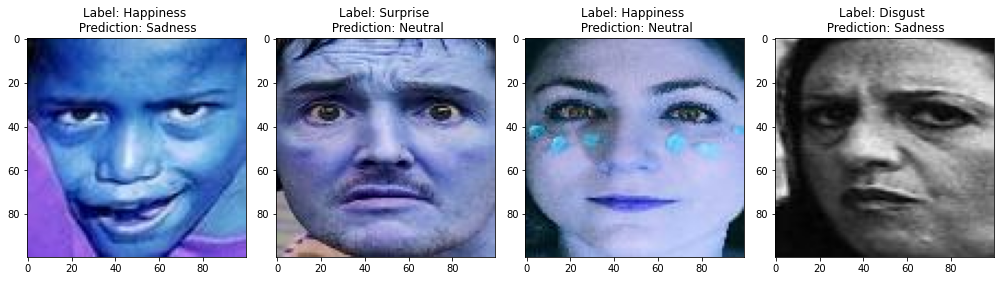

In [ ]:
path_to_testset = os.path.join(GOOGLE_DRIVE_PATH, 'CW_Dataset/test/')
EmotionRecognition_MLP(path_to_testset, MLP_HOG)

## SVM-HOG

In [29]:
def EmotionRecognition_SVM(test_path,model_type):
  files = [file for file in sorted(os.listdir(test_path)) if file.endswith('.jpg')]
  images = [cv2.imread(os.path.join(test_path, file)) for file in files]
  f = open("/content/drive/MyDrive/CV_Coursework/CW_Folder_PG/CW_Folder_PG/CW_Dataset/labels/list_label_test.txt" , "r")
  labels = [row.split(' ')[1][0] for row in f]
  x= images
  y = labels
  
  hog_images = []
  hog_labels = []
  ppc=16
  len_x_test = len(x)
      
  for i in range(len_x_test):
    img = img_as_ubyte(color.rgb2gray(x[i]))
    fd, hog_image = hog( img, orientations=8, pixels_per_cell=(ppc, ppc),  cells_per_block=(1, 1), visualize=True)
    hog_images.append(hog_image)
    hog_labels.append(fd)
  y_pred = model_type.predict(hog_labels)
 
  plt.figure(figsize=(14, 11), linewidth=1)

  for i in range(1,5):
    k = random.randint(1,100)
    lbl = exp_dict["{}".format(y[k])]
    preds = exp_dict["{}".format(y_pred[k])]
    plt.subplot(1,4,i)
    plt.imshow(x[k])
    plt.title(f'Label: {lbl} \n Prediction: {preds}')

  plt.tight_layout()
  plt.show


In [30]:
best_svm_hog = "/content/drive/MyDrive/CV_Coursework/CW_Folder_PG/CW_Folder_PG/Models/SVM_HOG.pickle"

with open(best_svm_hog, "rb") as f:
    SVM_trained = pickle.load(f)

In [31]:
SVM_HOG = SVM_trained

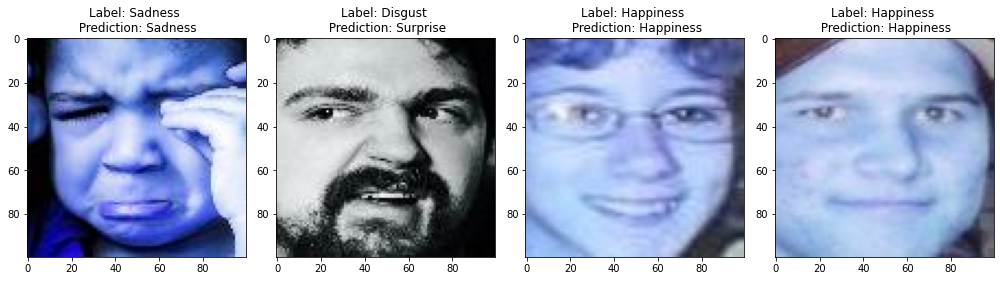

In [32]:
path_to_testset = os.path.join(GOOGLE_DRIVE_PATH, 'CW_Dataset/test/')
EmotionRecognition_SVM(path_to_testset, SVM_HOG)

## CNN


In [ ]:
class MyDataset(Dataset):
    def __init__(self, dataframe, targets, transform=None):
        self.dataframe = dataframe
        self.targets = targets
        self.transform = transform
    def __len__(self):
        return len(self.dataframe)    
    def __getitem__(self, index):
        if torch.is_tensor(index):
          index = index.tolist()
        
        ## Add the path of the images
        im_path = os.path.join(self.targets, self.dataframe.iloc[index, 0])
        im = Image.open(im_path)
        im_label = self.dataframe.iloc[index, 1]
        if self.transform:
            im = self.transform(im)
        
        return im, im_label

In [ ]:
train_txt = "/content/labels/list_label_train.txt"
test_txt = "/content/labels/list_label_test.txt"

In [ ]:
dataframe_CNN = ["Image","Label"]

label_test = pd.read_csv(test_txt, names = dataframe_CNN,delim_whitespace = True)
label_test["Image"] = label_test["Image"].apply(lambda i: i[:-4])
label_test["Image"] = label_test["Image"] + "_aligned.jpg"

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
test_image_path = "/content/test"
test_img = MyDataset(dataframe = label_test,targets = test_image_path, transform = transform)
testloader = torch.utils.data.DataLoader(test_img, batch_size=64,
                                         shuffle=False, num_workers=2)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 22 * 22 , 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 8)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), 16 * 22 *22)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
Model_path = "/content/drive/MyDrive/CV_Coursework/CW_Folder_PG/CW_Folder_PG/Models/CNN_FR.pt"

net=Net()
net.load_state_dict(torch.load(Model_path))

# net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Estimate average accuracy
correct = 0
total = 0
with torch.no_grad():             # Avoid backprop at test 
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the 10000 test images: {100 * correct / total}%")

Accuracy of the network on the 10000 test images: 74.86962190352021%


In [ ]:
def EmotionRecognition_CNN(test_path,model_type):
  class MyDataset(Dataset):
    def __init__(self, dataframe, targets, transform=None):
        self.dataframe = dataframe
        self.targets = targets
        self.transform = transform
    def __len__(self):
        return len(self.dataframe)    
    def __getitem__(self, index):
        if torch.is_tensor(index):
          index = index.tolist()
        
        ## Add the path of the images
        im_path = os.path.join(self.targets, self.dataframe.iloc[index, 0])
        im = Image.open(im_path)
        im_label = self.dataframe.iloc[index, 1]
        if self.transform:
            im = self.transform(im)
        
        return im, im_label

  dataframe_CNN = ["Image","Label"]

  label_test = pd.read_csv(test_txt, names = dataframe_CNN,delim_whitespace = True)
  label_test["Image"] = label_test["Image"].apply(lambda i: i[:-4])
  label_test["Image"] = label_test["Image"] + "_aligned.jpg"

  transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
  
  test_image_path = test_path
  test_img = MyDataset(dataframe = label_test,targets = test_image_path, transform = transform)
  testloader = torch.utils.data.DataLoader(test_img, batch_size=64,
                                          shuffle=False, num_workers=2)
    
  net=Net()
  net.load_state_dict(torch.load(Model_path))
  
  # Estimate average accuracy
  correct = 0
  total = 0
  with torch.no_grad():             # Avoid backprop at test 
      for data in testloader:
          images, labels = data
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  print(f"Accuracy of the network on the 10000 test images: {100 * correct / total}%")

  #unnormalize images
  def imshow(i):
    npimg = i.numpy()
    npimg = np.transpose(npimg, (1,2,0))
    npimg = ((npimg * [0.5, 0.5, 0.5]) + [0.5, 0.5, 0.5])
    return npimg
  
  list_img =[]
  empty = []
  for i in labels:
    list_img.append(labels.detach().numpy())
  for j in list_img:
    empty.append(j)

  plt.figure(figsize=(14, 11), linewidth=1)
  for i in range(1,5):    
    lbl = exp_dict["{}".format(j[i])]
    preds = exp_dict["{}".format(predicted[i])]
    plt.subplot(1,4,i)
    plt.imshow(imshow(images[i]))
    plt.title(f'Label: {lbl} \n Prediction: {preds}')

  plt.tight_layout()
  plt.show
  

Accuracy of the network on the 10000 test images: 74.86962190352021%


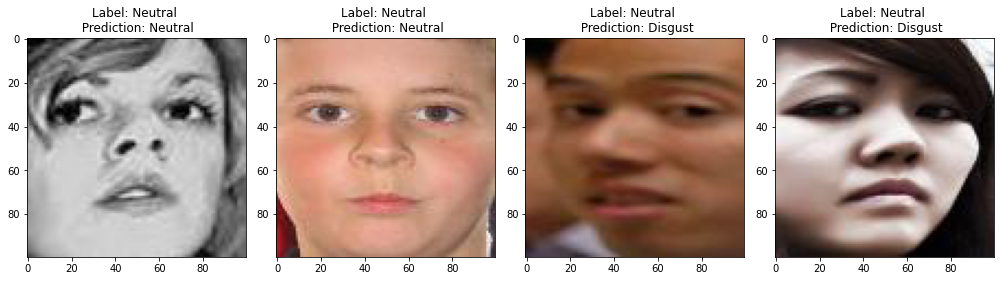

In [ ]:
CNN_Model = "/content/drive/MyDrive/CV_Coursework/CW_Folder_PG/CW_Folder_PG/Models/CNN_FR.pt"

EmotionRecognition_CNN(test_image_path, CNN_Model)


# Test EmotionRecognition

This section should allow a quick test of the `EmotionRecognition` function. First, add cells with the code needed to load the necessary subroutines to make `EmotionRecognition` work.

Then, make a call to the `EmotionRecognition` function to see what results it produces. You must also indicate the syntax needed to test your different models.

# Test EmotionRecognitionVideo

This section should allow a quick test of the `EmotionRecognitionVideo` function. First, add cells with the code needed to load the necessary subroutines to make `EmotionRecognitionVideo` work.

Then, make a call to the `EmotionRecognitionVideo` function to see what results it produces.

In [36]:
import pickle
with open("/content/drive/MyDrive/CV_Coursework/CW_Folder_PG/CW_Folder_PG/Models/alexnet_cnn.pkl", "rb") as alex_cnn:
    alex_cnn = pickle.load(alex_cnn)

In [37]:
video_input = '/content/drive/MyDrive/CV_Coursework/CW_Folder_PG/CW_Folder_PG/Video/videoplayback.mp4'

In [40]:
def EmotionRecognitionVideo(file):
  cap = cv2.VideoCapture(file)
  frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

  video = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))

  fc=0
  frame = frameCount
  ret = True

  cap = cv2.VideoCapture(file)
  transform = transforms.Compose(
    [transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

  while fc<frame and ret:  
    # Read the frame
    ret, img = cap.read()   #Reading frames   
    frame_colour = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Keeps it in colour
    fc+=1
    if(fc>20):
      break
    # Detect the faces
    face_haar_cas = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces_detected = face_haar_cas.detectMultiScale(img, scaleFactor = 1.2)

    
    for (x, y, w, h) in faces_detected:  #Want to detect the faces in the images

        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)  
        image_convert=Image.fromarray(frame_colour)
        img_transform=transform(image_convert)

        roi=frame_colour[y:y+2,x:x+h]
        roi=cv2.resize(roi,(38,38))

        img_transform=alex_cnn(img_transform.unsqueeze(0))
        preds=torch.max(img_transform.data,1)[1]

        
        index_max=int(np.argmax(preds))
        emotion_dic=("surprise","fear","disgust","happiness","sadness","anger","neutral")
        emo_pred1=emotion_dic[index_max]
        cv2.putText(img,emo_pred1,(int(x),int(y)),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3) 
    cv2_imshow(img)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  cap.release()

## Reference for this frame and everything have been taken from few sources Lab 5, Lab 6 ,
## https://towardsdatascience.com/face-detection-in-2-minutes-using-opencv-python-90f89d7c0f81 and 
## https://www.youtube.com/watch?v=UHdrxHPRBng&t=927s&ab_channel=DataMagic%28bySunnyKusawa%29 

In [ ]:
EmotionRecognitionVideo(video_input)